In [60]:
import osmnx as ox
import matplotlib.pyplot as plt 
import osmnx as ox
import pandas as pd
from geopy import distance
import requests # to call the openmap/google apis
import json
import datetime
import math
import itertools
import numpy as np

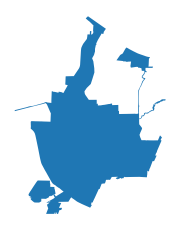

In [61]:
rochester_city = ox.geocode_to_gdf('Rochester, NY, USA')
ax = ox.project_gdf(rochester_city).plot()
_ = ax.axis('off')

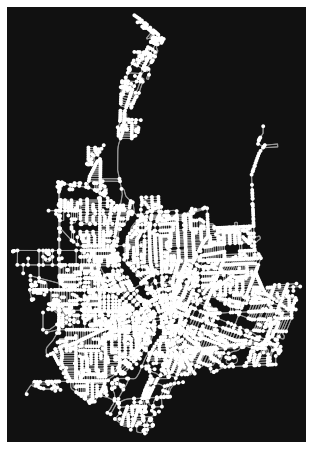

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [62]:
rochester_graph = ox.graph_from_place('Rochester, NY, USA', network_type='drive')
ox.plot_graph(rochester_graph)

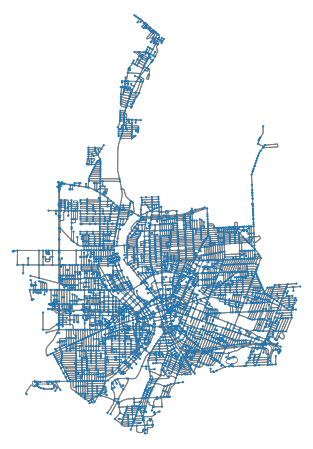

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [63]:
import matplotlib.pyplot as plt 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(rochester_graph, bgcolor='#FFFFFF', node_color=colors[0], edge_color='grey', node_size=5)

In [64]:
# Sample bounding box in Rochester, NY - Plymouth exchange - Mayors Heights
#north, south, east, west = 43.133656,43.138291,-77.603903,-77.597766
north, south, east, west = 43.151145,43.155058,-77.595792,-77.590728


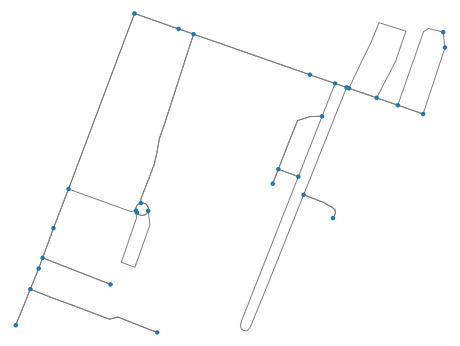

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [65]:
# create a network from the above bounded box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='gray', node_size=20)

In [66]:
#Number of nodes within the selected area
count=0
for i in G.nodes:
    count=count+1
print(count)

30


In [67]:
for i in G.nodes:
    print(i)

212627962
212627965
212627970
212639650
212859875
4580588922
6020939256
6020939269
6020939284
6020939985
6020939988
6020939994
6020939999
6948084776
6948084777
7101381637
7101381644
7222378610
7222378613
7222378614
7222378615
7313770417
7313770421
7313770422
7313770423
7479405632
7479405637
8434072981
8434072988
8578682573


In [68]:
#Add locations to dataframe
Locations = []
for i in G.nodes:
    Locations.append(i)

In [69]:
Locations

[212627962,
 212627965,
 212627970,
 212639650,
 212859875,
 4580588922,
 6020939256,
 6020939269,
 6020939284,
 6020939985,
 6020939988,
 6020939994,
 6020939999,
 6948084776,
 6948084777,
 7101381637,
 7101381644,
 7222378610,
 7222378613,
 7222378614,
 7222378615,
 7313770417,
 7313770421,
 7313770422,
 7313770423,
 7479405632,
 7479405637,
 8434072981,
 8434072988,
 8578682573]

In [70]:
roc_data = pd.DataFrame(Locations)
roc_data.rename(columns = {0:'Locations'}, inplace = True)
roc_data

,Locations
0,212627962
1,212627965
2,212627970
3,212639650
4,212859875
5,4580588922
6,6020939256
7,6020939269
8,6020939284
9,6020939985


In [71]:
#Appending lats and longitudes
latitude = []
longitude = []
for i in Locations:
    latitude.append(G.nodes[i].get('y'))
    longitude.append(G.nodes[i].get('x'))

In [72]:
roc_data['Latitude'] = latitude
roc_data['Longitude'] = longitude

In [73]:
#Display the locations along with latitudes and longitudes in the dataframe
roc_data

,Locations,Latitude,Longitude
0,212627962,43.152906,-77.595515
1,212627965,43.153245,-77.595345
2,212627970,43.155050,-77.594411
3,212639650,43.154462,-77.592100
4,212859875,43.154535,-77.592389
5,4580588922,43.154428,-77.591966
6,6020939256,43.154921,-77.593903
7,6020939269,43.154877,-77.593730
8,6020939284,43.153392,-77.594394
9,6020939985,43.153376,-77.594384


In [74]:
#Converting the dataframe to a csv
roc_data.to_csv("BoxAreaRochester.csv")

In [75]:
roc_df = pd.read_csv("BoxAreaRochester.csv")

In [76]:
roc_df

,Unnamed: 0,Locations,Latitude,Longitude
0,0,212627962,43.152906,-77.595515
1,1,212627965,43.153245,-77.595345
2,2,212627970,43.155050,-77.594411
3,3,212639650,43.154462,-77.592100
4,4,212859875,43.154535,-77.592389
5,5,4580588922,43.154428,-77.591966
6,6,6020939256,43.154921,-77.593903
7,7,6020939269,43.154877,-77.593730
8,8,6020939284,43.153392,-77.594394
9,9,6020939985,43.153376,-77.594384


In [77]:
roc_df = roc_df.drop(['Locations'],axis=1)
roc_df.rename(columns = {'Latitude':'Left'}, inplace = True)
roc_df.rename(columns = {'Longitude':'Right'}, inplace = True)

In [78]:
roc_df

,Unnamed: 0,Left,Right
0,0,43.152906,-77.595515
1,1,43.153245,-77.595345
2,2,43.155050,-77.594411
3,3,43.154462,-77.592100
4,4,43.154535,-77.592389
5,5,43.154428,-77.591966
6,6,43.154921,-77.593903
7,7,43.154877,-77.593730
8,8,43.153392,-77.594394
9,9,43.153376,-77.594384


In [79]:
import requests # to call the openmap/google apis -- OSRM for distances
r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[0, "Right"]},{roc_df.loc[0, "Left"]};{roc_df.loc[29, "Right"]},{roc_df.loc[29, "Left"]}?overview=false""")

In [80]:
r.content

b'{"code":"Ok","waypoints":[{"hint":"Wb2ahs29moYAAAAAEwAAAAAAAAAAAAAAAAAAAHIFp0EAAAAAAAAAAAAAAAATAAAAAAAAAAAAAACzRQAAhfxf-wp2kgKF_F_7CnaSAgAArww4uPSV","distance":0,"location":[-77.595515,43.152906],"name":"Alexander Street"},{"hint":"-1sbgK9bG4APAAAAAAAAAAAAAAAAAAAAREeBQQAAAAAAAAAAAAAAAA8AAAAAAAAAAAAAAAAAAACzRQAAfPtf-y10kgJ8-1_7LXSSAgAAXwE4uPSV","distance":0,"location":[-77.59578,43.152429],"name":"Alexander Street"}],"routes":[{"legs":[{"steps":[],"weight":5.3,"distance":57.2,"summary":"","duration":5.3}],"weight_name":"routability","weight":5.3,"distance":57.2,"duration":5.3}]}'

In [81]:
json.loads(r.content)["routes"][0]["distance"]

57.2

In [82]:
import json
df3 = pd.DataFrame()
for j in roc_df.index:
    list1 = []
    for i in roc_df.index:
        r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[j, "Right"]},{roc_df.loc[j, "Left"]};{roc_df.loc[i, "Right"]},{roc_df.loc[i, "Left"]}?overview=false""")
        list1.append(json.loads(r.content)["routes"][0]["distance"])
    df3[j] = list1

In [83]:
json.loads(r.content)

{'code': 'Ok',
 'waypoints': [{'hint': '-1sbgK9bG4APAAAAAAAAAAAAAAAAAAAAREeBQQAAAAAAAAAAAAAAAA8AAAAAAAAAAAAAAAAAAACzRQAAfPtf-y10kgJ8-1_7LXSSAgAAXwE4uPSV',
   'distance': 0,
   'location': [-77.59578, 43.152429],
   'name': 'Alexander Street'},
  {'hint': '-1sbgK9bG4APAAAAAAAAAAAAAAAAAAAAREeBQQAAAAAAAAAAAAAAAA8AAAAAAAAAAAAAAAAAAACzRQAAfPtf-y10kgJ8-1_7LXSSAgAAXwE4uPSV',
   'distance': 0,
   'location': [-77.59578, 43.152429],
   'name': 'Alexander Street'}],
 'routes': [{'legs': [{'steps': [],
     'weight': 0,
     'distance': 0,
     'summary': '',
     'duration': 0}],
   'weight_name': 'routability',
   'weight': 0,
   'distance': 0,
   'duration': 0}]}

In [84]:
df3

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,40.1,254.7,453.3,428.5,464.8,298.4,313.3,488.7,490.6,...,540.6,930.3,904.0,889.5,869.5,20.9,147.7,573.0,614.2,57.2
1,40.1,0.0,214.6,413.2,388.4,424.7,258.2,273.1,448.5,450.5,...,500.4,890.1,863.9,849.3,829.4,61.0,187.9,532.9,574.0,97.4
2,254.7,214.6,0.0,198.6,173.8,210.1,43.6,58.5,233.9,235.9,...,285.8,675.5,649.3,634.7,614.8,275.6,402.5,318.3,359.4,312.0
3,453.3,413.2,198.6,0.0,24.8,11.5,154.9,140.1,315.5,317.5,...,87.3,476.9,450.7,436.1,416.2,474.2,601.1,119.7,160.8,510.6
4,428.5,388.4,173.8,24.8,0.0,36.3,130.1,115.3,290.7,292.7,...,112.1,501.7,475.5,461.0,441.0,449.4,576.2,144.5,185.6,485.8
5,464.8,424.7,210.1,11.5,36.3,0.0,166.5,151.6,327.0,329.0,...,75.7,465.4,439.2,424.6,404.7,485.7,612.6,108.2,149.3,522.1
6,298.4,258.2,43.6,154.9,130.1,166.5,0.0,14.9,190.3,192.2,...,242.2,631.9,605.7,591.1,571.2,319.3,446.1,274.7,315.8,355.6
7,313.3,273.1,58.5,140.1,115.3,151.6,14.9,0.0,175.4,177.4,...,227.3,617.0,590.8,576.2,556.3,334.1,461.0,259.8,300.9,370.5
8,146.3,106.1,242.3,315.5,290.7,327.0,190.3,175.4,0.0,2.0,...,402.8,792.4,766.2,751.7,731.7,167.2,294.0,435.2,476.3,203.5
9,148.2,108.1,244.3,317.5,292.7,329.0,192.2,177.4,2.0,0.0,...,404.7,794.4,768.2,753.6,733.7,169.1,295.9,437.2,478.3,205.5


In [85]:
df = roc_df

In [86]:
df['coordinate'] = list(zip(df['Right'],df['Left']))
df['ID'] = df.index

In [87]:
df

,Unnamed: 0,Left,Right,coordinate,ID
0,0,43.152906,-77.595515,"(-77.595515, 43.152906)",0
1,1,43.153245,-77.595345,"(-77.595345, 43.153245)",1
2,2,43.155050,-77.594411,"(-77.594411, 43.15505)",2
3,3,43.154462,-77.592100,"(-77.5920996, 43.1544619)",3
4,4,43.154535,-77.592389,"(-77.592389, 43.154535)",4
5,5,43.154428,-77.591966,"(-77.5919664, 43.1544283)",5
6,6,43.154921,-77.593903,"(-77.5939027, 43.1549205)",6
7,7,43.154877,-77.593730,"(-77.5937303, 43.1548766)",7
8,8,43.153392,-77.594394,"(-77.5943938, 43.1533924)",8
9,9,43.153376,-77.594384,"(-77.594384, 43.1533757)",9


In [88]:
locations = dict( ( ID, (df.loc[ID, 'Right'], df.loc[ID, 'Left']) ) for ID in df.index)
locations

{0: (-77.595515, 43.152906),
 1: (-77.595345, 43.153245),
 2: (-77.594411, 43.15505),
 3: (-77.5920996, 43.1544619),
 4: (-77.592389, 43.154535),
 5: (-77.5919664, 43.1544283),
 6: (-77.5939027, 43.1549205),
 7: (-77.5937303, 43.1548766),
 8: (-77.5943938, 43.1533924),
 9: (-77.594384, 43.1533757),
 10: (-77.5942533, 43.1533906),
 11: (-77.5943378, 43.1534558),
 12: (-77.5951717, 43.1535742),
 13: (-77.5954702, 43.1529954),
 14: (-77.594687, 43.152772),
 15: (-77.5916196, 43.1543407),
 16: (-77.591939, 43.1544214),
 17: (-77.5913761, 43.1542792),
 18: (-77.5908533, 43.1548934),
 19: (-77.5908318, 43.1547633),
 20: (-77.5910841, 43.1542054),
 21: (-77.5922486, 43.1541858),
 22: (-77.5928179, 43.1536186),
 23: (-77.5927528, 43.1537407),
 24: (-77.5925225, 43.1536782),
 25: (-77.5956115, 43.1527319),
 26: (-77.5941491, 43.1523682),
 27: (-77.5924617, 43.1535251),
 28: (-77.5921227, 43.1533298),
 29: (-77.5957795, 43.1524288)}

In [89]:
distances_df = df3
distances_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,40.1,254.7,453.3,428.5,464.8,298.4,313.3,488.7,490.6,...,540.6,930.3,904.0,889.5,869.5,20.9,147.7,573.0,614.2,57.2
1,40.1,0.0,214.6,413.2,388.4,424.7,258.2,273.1,448.5,450.5,...,500.4,890.1,863.9,849.3,829.4,61.0,187.9,532.9,574.0,97.4
2,254.7,214.6,0.0,198.6,173.8,210.1,43.6,58.5,233.9,235.9,...,285.8,675.5,649.3,634.7,614.8,275.6,402.5,318.3,359.4,312.0
3,453.3,413.2,198.6,0.0,24.8,11.5,154.9,140.1,315.5,317.5,...,87.3,476.9,450.7,436.1,416.2,474.2,601.1,119.7,160.8,510.6
4,428.5,388.4,173.8,24.8,0.0,36.3,130.1,115.3,290.7,292.7,...,112.1,501.7,475.5,461.0,441.0,449.4,576.2,144.5,185.6,485.8
5,464.8,424.7,210.1,11.5,36.3,0.0,166.5,151.6,327.0,329.0,...,75.7,465.4,439.2,424.6,404.7,485.7,612.6,108.2,149.3,522.1
6,298.4,258.2,43.6,154.9,130.1,166.5,0.0,14.9,190.3,192.2,...,242.2,631.9,605.7,591.1,571.2,319.3,446.1,274.7,315.8,355.6
7,313.3,273.1,58.5,140.1,115.3,151.6,14.9,0.0,175.4,177.4,...,227.3,617.0,590.8,576.2,556.3,334.1,461.0,259.8,300.9,370.5
8,146.3,106.1,242.3,315.5,290.7,327.0,190.3,175.4,0.0,2.0,...,402.8,792.4,766.2,751.7,731.7,167.2,294.0,435.2,476.3,203.5
9,148.2,108.1,244.3,317.5,292.7,329.0,192.2,177.4,2.0,0.0,...,404.7,794.4,768.2,753.6,733.7,169.1,295.9,437.2,478.3,205.5


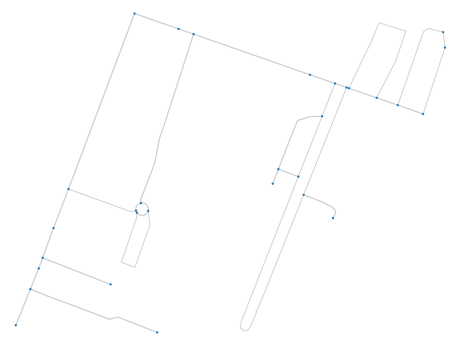

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [90]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

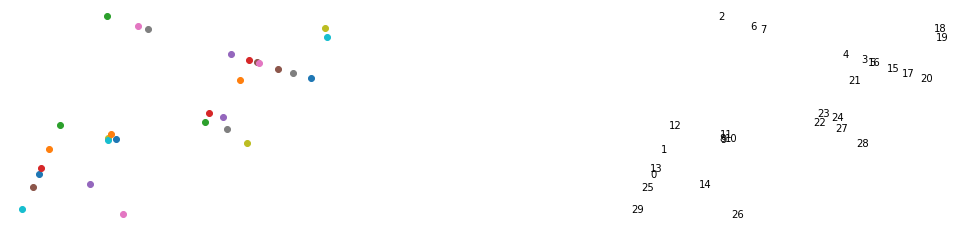

In [91]:
import matplotlib.pyplot as plt
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [92]:
distance = distances_df

In [93]:
type(df.ID[0])

numpy.int64

In [94]:
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 40.1,
 (0, 2): 254.7,
 (0, 3): 453.3,
 (0, 4): 428.5,
 (0, 5): 464.8,
 (0, 6): 298.4,
 (0, 7): 313.3,
 (0, 8): 488.7,
 (0, 9): 490.6,
 (0, 10): 491.2,
 (0, 11): 479.3,
 (0, 12): 555.6,
 (0, 13): 10.6,
 (0, 14): 78.8,
 (0, 15): 494.5,
 (0, 16): 467.2,
 (0, 17): 515.5,
 (0, 18): 620.5,
 (0, 19): 605.9,
 (0, 20): 540.6,
 (0, 21): 930.3,
 (0, 22): 904.0,
 (0, 23): 889.5,
 (0, 24): 869.5,
 (0, 25): 20.9,
 (0, 26): 147.7,
 (0, 27): 573.0,
 (0, 28): 614.2,
 (0, 29): 57.2,
 (1, 0): 40.1,
 (1, 2): 214.6,
 (1, 3): 413.2,
 (1, 4): 388.4,
 (1, 5): 424.7,
 (1, 6): 258.2,
 (1, 7): 273.1,
 (1, 8): 448.5,
 (1, 9): 450.5,
 (1, 10): 451.1,
 (1, 11): 439.1,
 (1, 12): 515.5,
 (1, 13): 29.6,
 (1, 14): 97.8,
 (1, 15): 454.4,
 (1, 16): 427.0,
 (1, 17): 475.4,
 (1, 18): 580.3,
 (1, 19): 565.8,
 (1, 20): 500.4,
 (1, 21): 890.1,
 (1, 22): 863.9,
 (1, 23): 849.3,
 (1, 24): 829.4,
 (1, 25): 61.0,
 (1, 26): 187.9,
 (1, 27): 532.9,
 (1, 28): 574.0,
 (1, 29): 97.4,
 (2, 0): 254.7,
 (2, 1): 214.6,
 (2, 3): 1

In [95]:
V = 3 #the number vehicles/people deployed

In [96]:
import networkx as nx
from pulp import *
import seaborn as sn
prob=LpProblem("vehicle", LpMinimize)

In [97]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [98]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [99]:
#constraints
for v in df.ID:
    cap = 1 if v != 22 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 22 and j!= 22) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [ ]:
%time prob.solve()
print(LpStatus[prob.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/74dc65e62eb9472986dfa1c127d7ac7f-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/74dc65e62eb9472986dfa1c127d7ac7f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 877 COLUMNS
At line 7722 RHS
At line 8595 BOUNDS
At line 9495 ENDATA
Problem MODEL has 872 rows, 899 columns and 4176 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2504.86 - 0.00 seconds
Cgl0004I processed model has 872 rows, 899 columns (899 integer (870 of which binary)) and 4176 elements
Cutoff increment increased from 1e-05 to 0.0999
Cbc0038I Initial state - 38 integers unsatisfied sum - 6.4
Cbc0038I Pass   1: su

Cbc0010I After 70000 nodes, 22659 on tree, 4855.4 best solution, best possible 2577.2575 (162.61 seconds)
Cbc0010I After 71000 nodes, 23142 on tree, 4855.4 best solution, best possible 2577.2575 (164.57 seconds)
Cbc0010I After 72000 nodes, 23618 on tree, 4855.4 best solution, best possible 2577.2575 (166.50 seconds)
Cbc0010I After 73000 nodes, 23932 on tree, 4855.4 best solution, best possible 2577.2575 (168.17 seconds)
Cbc0010I After 74000 nodes, 24046 on tree, 4855.4 best solution, best possible 2577.2575 (170.23 seconds)
Cbc0010I After 75000 nodes, 24526 on tree, 4855.4 best solution, best possible 2577.2575 (172.18 seconds)
Cbc0010I After 76000 nodes, 24499 on tree, 4855.4 best solution, best possible 2577.2575 (174.92 seconds)
Cbc0010I After 77000 nodes, 24496 on tree, 4855.4 best solution, best possible 2577.2575 (176.99 seconds)
Cbc0010I After 78000 nodes, 24581 on tree, 4855.4 best solution, best possible 2577.2575 (178.96 seconds)
Cbc0010I After 79000 nodes, 24570 on tree, 485

Cbc0010I After 217000 nodes, 24878 on tree, 4855.4 best solution, best possible 2577.2575 (528.24 seconds)
Cbc0010I After 218000 nodes, 24880 on tree, 4855.4 best solution, best possible 2577.2575 (530.44 seconds)
Cbc0010I After 219000 nodes, 24881 on tree, 4855.4 best solution, best possible 2577.2575 (532.71 seconds)
Cbc0010I After 220000 nodes, 24877 on tree, 4855.4 best solution, best possible 2577.2575 (535.46 seconds)
Cbc0010I After 221000 nodes, 24879 on tree, 4855.4 best solution, best possible 2577.2575 (538.28 seconds)
Cbc0010I After 222000 nodes, 24878 on tree, 4855.4 best solution, best possible 2577.2575 (540.91 seconds)
Cbc0010I After 223000 nodes, 24869 on tree, 4855.4 best solution, best possible 2577.2575 (543.84 seconds)
Cbc0010I After 224000 nodes, 24899 on tree, 4855.4 best solution, best possible 2577.2575 (547.36 seconds)
Cbc0010I After 225000 nodes, 24897 on tree, 4855.4 best solution, best possible 2577.2575 (549.98 seconds)
Cbc0010I After 226000 nodes, 24898 on

Cbc0010I After 365000 nodes, 24885 on tree, 4855.4 best solution, best possible 2577.2575 (858.64 seconds)
Cbc0010I After 366000 nodes, 24883 on tree, 4855.4 best solution, best possible 2577.2575 (860.57 seconds)
Cbc0010I After 367000 nodes, 24878 on tree, 4855.4 best solution, best possible 2577.2575 (862.32 seconds)
Cbc0038I Full problem 872 rows 899 columns, reduced to 823 rows 53 columns - 7 fixed gives 812, 32 - still too large
Cbc0038I Full problem 872 rows 899 columns, reduced to 812 rows 32 columns - too large
Cbc0010I After 368000 nodes, 24888 on tree, 4855.4 best solution, best possible 2577.2575 (864.55 seconds)
Cbc0010I After 369000 nodes, 24878 on tree, 4855.4 best solution, best possible 2577.2575 (866.90 seconds)
Cbc0010I After 370000 nodes, 24882 on tree, 4855.4 best solution, best possible 2577.2575 (869.39 seconds)
Cbc0010I After 371000 nodes, 24888 on tree, 4855.4 best solution, best possible 2577.2575 (871.74 seconds)
Cbc0010I After 372000 nodes, 24887 on tree, 485

Cbc0010I After 513000 nodes, 24878 on tree, 4855.4 best solution, best possible 2577.2575 (1186.12 seconds)
Cbc0010I After 514000 nodes, 24876 on tree, 4855.4 best solution, best possible 2577.2575 (1188.41 seconds)
Cbc0010I After 515000 nodes, 24882 on tree, 4855.4 best solution, best possible 2577.2575 (1190.39 seconds)
Cbc0010I After 516000 nodes, 24891 on tree, 4855.4 best solution, best possible 2577.2575 (1192.59 seconds)
Cbc0010I After 517000 nodes, 24871 on tree, 4855.4 best solution, best possible 2577.2575 (1194.72 seconds)
Cbc0010I After 518000 nodes, 24892 on tree, 4855.4 best solution, best possible 2577.2575 (1196.72 seconds)
Cbc0038I Full problem 872 rows 899 columns, reduced to 723 rows 51 columns - 7 fixed gives 57, 30 - ok now
Cbc0010I After 519000 nodes, 24892 on tree, 4855.4 best solution, best possible 2577.2575 (1199.08 seconds)
Cbc0010I After 520000 nodes, 24888 on tree, 4855.4 best solution, best possible 2577.2575 (1201.41 seconds)
Cbc0010I After 521000 nodes, 

Cbc0010I After 664000 nodes, 24911 on tree, 4855.4 best solution, best possible 2577.2575 (1532.29 seconds)
Cbc0010I After 665000 nodes, 24899 on tree, 4855.4 best solution, best possible 2577.2575 (1534.57 seconds)
Cbc0010I After 666000 nodes, 24887 on tree, 4855.4 best solution, best possible 2577.2575 (1537.20 seconds)
Cbc0010I After 667000 nodes, 24893 on tree, 4855.4 best solution, best possible 2577.2575 (1539.38 seconds)
Cbc0010I After 668000 nodes, 24890 on tree, 4855.4 best solution, best possible 2577.2575 (1541.88 seconds)
Cbc0010I After 669000 nodes, 24899 on tree, 4855.4 best solution, best possible 2577.2575 (1544.20 seconds)
Cbc0010I After 670000 nodes, 24892 on tree, 4855.4 best solution, best possible 2577.2575 (1546.55 seconds)
Cbc0010I After 671000 nodes, 24900 on tree, 4855.4 best solution, best possible 2577.2575 (1548.87 seconds)
Cbc0010I After 672000 nodes, 24897 on tree, 4855.4 best solution, best possible 2577.2575 (1551.12 seconds)
Cbc0010I After 673000 nodes,

Cbc0010I After 814000 nodes, 24889 on tree, 4855.4 best solution, best possible 2577.2575 (1880.35 seconds)
Cbc0010I After 815000 nodes, 24894 on tree, 4855.4 best solution, best possible 2577.2575 (1882.64 seconds)
Cbc0010I After 816000 nodes, 24887 on tree, 4855.4 best solution, best possible 2577.2575 (1885.09 seconds)
Cbc0010I After 817000 nodes, 24890 on tree, 4855.4 best solution, best possible 2577.2575 (1887.60 seconds)
Cbc0010I After 818000 nodes, 24885 on tree, 4855.4 best solution, best possible 2577.2575 (1889.98 seconds)
Cbc0010I After 819000 nodes, 24889 on tree, 4855.4 best solution, best possible 2577.2575 (1892.49 seconds)
Cbc0010I After 820000 nodes, 24891 on tree, 4855.4 best solution, best possible 2577.2575 (1895.00 seconds)
Cbc0010I After 821000 nodes, 24889 on tree, 4855.4 best solution, best possible 2577.2575 (1897.35 seconds)
Cbc0010I After 822000 nodes, 24894 on tree, 4855.4 best solution, best possible 2577.2575 (1899.84 seconds)
Cbc0010I After 823000 nodes,

Cbc0010I After 963000 nodes, 24882 on tree, 4855.4 best solution, best possible 2577.2575 (2236.25 seconds)
Cbc0010I After 964000 nodes, 24890 on tree, 4855.4 best solution, best possible 2577.2575 (2238.73 seconds)
Cbc0010I After 965000 nodes, 24883 on tree, 4855.4 best solution, best possible 2577.2575 (2240.93 seconds)
Cbc0010I After 966000 nodes, 24882 on tree, 4855.4 best solution, best possible 2577.2575 (2243.08 seconds)
Cbc0010I After 967000 nodes, 24872 on tree, 4855.4 best solution, best possible 2577.2575 (2245.23 seconds)
Cbc0010I After 968000 nodes, 24889 on tree, 4855.4 best solution, best possible 2577.2575 (2247.33 seconds)
Cbc0010I After 969000 nodes, 24880 on tree, 4855.4 best solution, best possible 2577.2575 (2249.65 seconds)
Cbc0010I After 970000 nodes, 24879 on tree, 4855.4 best solution, best possible 2577.2575 (2252.02 seconds)
Cbc0010I After 971000 nodes, 24897 on tree, 4855.4 best solution, best possible 2577.2575 (2254.37 seconds)
Cbc0010I After 972000 nodes,

Cbc0010I After 1113000 nodes, 24888 on tree, 4855.4 best solution, best possible 2577.2575 (2564.23 seconds)
Cbc0010I After 1114000 nodes, 24888 on tree, 4855.4 best solution, best possible 2577.2575 (2566.33 seconds)
Cbc0010I After 1115000 nodes, 24881 on tree, 4855.4 best solution, best possible 2577.2575 (2568.51 seconds)
Cbc0010I After 1116000 nodes, 24888 on tree, 4855.4 best solution, best possible 2577.2575 (2570.61 seconds)
Cbc0010I After 1117000 nodes, 24889 on tree, 4855.4 best solution, best possible 2577.2575 (2572.41 seconds)
Cbc0010I After 1118000 nodes, 24884 on tree, 4855.4 best solution, best possible 2577.2575 (2573.92 seconds)
Cbc0010I After 1119000 nodes, 24885 on tree, 4855.4 best solution, best possible 2577.2575 (2575.55 seconds)
Cbc0010I After 1120000 nodes, 24881 on tree, 4855.4 best solution, best possible 2577.2575 (2577.44 seconds)
Cbc0010I After 1121000 nodes, 24886 on tree, 4855.4 best solution, best possible 2577.2575 (2579.51 seconds)
Cbc0010I After 1122

Cbc0010I After 1262000 nodes, 24872 on tree, 4855.4 best solution, best possible 2577.2575 (2876.22 seconds)
Cbc0010I After 1263000 nodes, 24876 on tree, 4855.4 best solution, best possible 2577.2575 (2878.33 seconds)
Cbc0010I After 1264000 nodes, 24881 on tree, 4855.4 best solution, best possible 2577.2575 (2880.48 seconds)
Cbc0010I After 1265000 nodes, 24891 on tree, 4855.4 best solution, best possible 2577.2575 (2882.60 seconds)
Cbc0010I After 1266000 nodes, 24885 on tree, 4855.4 best solution, best possible 2577.2575 (2884.92 seconds)
Cbc0010I After 1267000 nodes, 24888 on tree, 4855.4 best solution, best possible 2577.2575 (2887.15 seconds)
Cbc0010I After 1268000 nodes, 24881 on tree, 4855.4 best solution, best possible 2577.2575 (2889.49 seconds)
Cbc0010I After 1269000 nodes, 24887 on tree, 4855.4 best solution, best possible 2577.2575 (2891.57 seconds)
Cbc0010I After 1270000 nodes, 24885 on tree, 4855.4 best solution, best possible 2577.2575 (2893.98 seconds)
Cbc0010I After 1271

Cbc0010I After 1411000 nodes, 25282 on tree, 4853.1 best solution, best possible 2577.2575 (3188.16 seconds)
Cbc0010I After 1412000 nodes, 25271 on tree, 4853.1 best solution, best possible 2577.2575 (3191.16 seconds)
Cbc0010I After 1413000 nodes, 25273 on tree, 4853.1 best solution, best possible 2577.2575 (3194.03 seconds)
Cbc0010I After 1414000 nodes, 25278 on tree, 4853.1 best solution, best possible 2577.2575 (3196.86 seconds)
Cbc0010I After 1415000 nodes, 25266 on tree, 4853.1 best solution, best possible 2577.2575 (3199.67 seconds)
Cbc0010I After 1416000 nodes, 25261 on tree, 4853.1 best solution, best possible 2577.2575 (3202.89 seconds)
Cbc0010I After 1417000 nodes, 25268 on tree, 4853.1 best solution, best possible 2577.2575 (3205.33 seconds)
Cbc0010I After 1418000 nodes, 25261 on tree, 4853.1 best solution, best possible 2577.2575 (3208.00 seconds)
Cbc0010I After 1419000 nodes, 25261 on tree, 4853.1 best solution, best possible 2577.2575 (3210.59 seconds)
Cbc0010I After 1420

Cbc0010I After 1557000 nodes, 25195 on tree, 4853.1 best solution, best possible 2577.2575 (3567.64 seconds)
Cbc0010I After 1558000 nodes, 25201 on tree, 4853.1 best solution, best possible 2577.2575 (3569.95 seconds)
Cbc0010I After 1559000 nodes, 25200 on tree, 4853.1 best solution, best possible 2577.2575 (3572.29 seconds)
Cbc0010I After 1560000 nodes, 25194 on tree, 4853.1 best solution, best possible 2577.2575 (3574.48 seconds)
Cbc0010I After 1561000 nodes, 25201 on tree, 4853.1 best solution, best possible 2577.2575 (3576.81 seconds)
Cbc0010I After 1562000 nodes, 25199 on tree, 4853.1 best solution, best possible 2577.2575 (3579.59 seconds)
Cbc0010I After 1563000 nodes, 25199 on tree, 4853.1 best solution, best possible 2577.2575 (3581.98 seconds)
Cbc0010I After 1564000 nodes, 25203 on tree, 4853.1 best solution, best possible 2577.2575 (3584.49 seconds)
Cbc0010I After 1565000 nodes, 25196 on tree, 4853.1 best solution, best possible 2577.2575 (3587.05 seconds)
Cbc0010I After 1566

Cbc0010I After 1706000 nodes, 25126 on tree, 4853.1 best solution, best possible 2577.2575 (3929.20 seconds)
Cbc0010I After 1707000 nodes, 25120 on tree, 4853.1 best solution, best possible 2577.2575 (3931.69 seconds)
Cbc0010I After 1708000 nodes, 25125 on tree, 4853.1 best solution, best possible 2577.2575 (3934.29 seconds)
Cbc0010I After 1709000 nodes, 25123 on tree, 4853.1 best solution, best possible 2577.2575 (3936.68 seconds)
Cbc0010I After 1710000 nodes, 25125 on tree, 4853.1 best solution, best possible 2577.2575 (3939.25 seconds)
Cbc0010I After 1711000 nodes, 25121 on tree, 4853.1 best solution, best possible 2577.2575 (3941.77 seconds)
Cbc0010I After 1712000 nodes, 25117 on tree, 4853.1 best solution, best possible 2577.2575 (3944.07 seconds)
Cbc0010I After 1713000 nodes, 25123 on tree, 4853.1 best solution, best possible 2577.2575 (3946.46 seconds)
Cbc0010I After 1714000 nodes, 25123 on tree, 4853.1 best solution, best possible 2577.2575 (3948.74 seconds)
Cbc0010I After 1715

Cbc0010I After 1856000 nodes, 25118 on tree, 4853.1 best solution, best possible 2577.2575 (4292.53 seconds)
Cbc0010I After 1857000 nodes, 25121 on tree, 4853.1 best solution, best possible 2577.2575 (4295.34 seconds)
Cbc0010I After 1858000 nodes, 25106 on tree, 4853.1 best solution, best possible 2577.2575 (4298.13 seconds)
Cbc0010I After 1859000 nodes, 25108 on tree, 4853.1 best solution, best possible 2577.2575 (4301.01 seconds)
Cbc0010I After 1860000 nodes, 25114 on tree, 4853.1 best solution, best possible 2577.2575 (4304.22 seconds)
Cbc0010I After 1861000 nodes, 25116 on tree, 4853.1 best solution, best possible 2577.2575 (4306.16 seconds)
Cbc0010I After 1862000 nodes, 25112 on tree, 4853.1 best solution, best possible 2577.2575 (4308.60 seconds)
Cbc0010I After 1863000 nodes, 25108 on tree, 4853.1 best solution, best possible 2577.2575 (4311.15 seconds)
Cbc0010I After 1864000 nodes, 25119 on tree, 4853.1 best solution, best possible 2577.2575 (4314.04 seconds)
Cbc0010I After 1865

Cbc0010I After 2005000 nodes, 25084 on tree, 4853.1 best solution, best possible 2577.2575 (4717.85 seconds)
Cbc0010I After 2006000 nodes, 25086 on tree, 4853.1 best solution, best possible 2577.2575 (4720.73 seconds)
Cbc0010I After 2007000 nodes, 25086 on tree, 4853.1 best solution, best possible 2577.2575 (4723.70 seconds)
Cbc0010I After 2008000 nodes, 25088 on tree, 4853.1 best solution, best possible 2577.2575 (4726.25 seconds)
Cbc0010I After 2009000 nodes, 25082 on tree, 4853.1 best solution, best possible 2577.2575 (4728.69 seconds)
Cbc0010I After 2010000 nodes, 25090 on tree, 4853.1 best solution, best possible 2577.2575 (4731.95 seconds)
Cbc0010I After 2011000 nodes, 25086 on tree, 4853.1 best solution, best possible 2577.2575 (4734.50 seconds)
Cbc0010I After 2012000 nodes, 25079 on tree, 4853.1 best solution, best possible 2577.2575 (4737.16 seconds)
Cbc0010I After 2013000 nodes, 25077 on tree, 4853.1 best solution, best possible 2577.2575 (4740.79 seconds)
Cbc0010I After 2014

Cbc0010I After 2155000 nodes, 25059 on tree, 4853.1 best solution, best possible 2577.2575 (5101.22 seconds)
Cbc0010I After 2156000 nodes, 25059 on tree, 4853.1 best solution, best possible 2577.2575 (5103.58 seconds)
Cbc0010I After 2157000 nodes, 25063 on tree, 4853.1 best solution, best possible 2577.2575 (5105.88 seconds)
Cbc0010I After 2158000 nodes, 25067 on tree, 4853.1 best solution, best possible 2577.2575 (5108.12 seconds)
Cbc0010I After 2159000 nodes, 25069 on tree, 4853.1 best solution, best possible 2577.2575 (5110.09 seconds)
Cbc0010I After 2160000 nodes, 25059 on tree, 4853.1 best solution, best possible 2577.2575 (5112.46 seconds)
Cbc0010I After 2161000 nodes, 25060 on tree, 4853.1 best solution, best possible 2577.2575 (5114.70 seconds)
Cbc0010I After 2162000 nodes, 25063 on tree, 4853.1 best solution, best possible 2577.2575 (5116.97 seconds)
Cbc0010I After 2163000 nodes, 25062 on tree, 4853.1 best solution, best possible 2577.2575 (5119.16 seconds)
Cbc0010I After 2164

Cbc0010I After 2303000 nodes, 25047 on tree, 4853.1 best solution, best possible 2577.2575 (5441.29 seconds)
Cbc0010I After 2304000 nodes, 25044 on tree, 4853.1 best solution, best possible 2577.2575 (5443.61 seconds)
Cbc0010I After 2305000 nodes, 25045 on tree, 4853.1 best solution, best possible 2577.2575 (5445.96 seconds)
Cbc0010I After 2306000 nodes, 25044 on tree, 4853.1 best solution, best possible 2577.2575 (5448.50 seconds)
Cbc0010I After 2307000 nodes, 25043 on tree, 4853.1 best solution, best possible 2577.2575 (5450.78 seconds)
Cbc0010I After 2308000 nodes, 25044 on tree, 4853.1 best solution, best possible 2577.2575 (5453.42 seconds)
Cbc0010I After 2309000 nodes, 25050 on tree, 4853.1 best solution, best possible 2577.2575 (5456.09 seconds)
Cbc0010I After 2310000 nodes, 25050 on tree, 4853.1 best solution, best possible 2577.2575 (5458.37 seconds)
Cbc0010I After 2311000 nodes, 25047 on tree, 4853.1 best solution, best possible 2577.2575 (5460.46 seconds)
Cbc0010I After 2312

Cbc0010I After 2454000 nodes, 25013 on tree, 4853.1 best solution, best possible 2577.2575 (5792.68 seconds)
Cbc0010I After 2455000 nodes, 25012 on tree, 4853.1 best solution, best possible 2577.2575 (5795.23 seconds)
Cbc0010I After 2456000 nodes, 25006 on tree, 4853.1 best solution, best possible 2577.2575 (5797.76 seconds)
Cbc0010I After 2457000 nodes, 25026 on tree, 4853.1 best solution, best possible 2577.2575 (5799.46 seconds)
Cbc0010I After 2458000 nodes, 25018 on tree, 4853.1 best solution, best possible 2577.2575 (5801.36 seconds)
Cbc0010I After 2459000 nodes, 25012 on tree, 4853.1 best solution, best possible 2577.2575 (5803.52 seconds)
Cbc0010I After 2460000 nodes, 25013 on tree, 4853.1 best solution, best possible 2577.2575 (5805.91 seconds)
Cbc0010I After 2461000 nodes, 25019 on tree, 4853.1 best solution, best possible 2577.2575 (5807.91 seconds)
Cbc0010I After 2462000 nodes, 25022 on tree, 4853.1 best solution, best possible 2577.2575 (5809.47 seconds)
Cbc0010I After 2463

Cbc0010I After 2604000 nodes, 25004 on tree, 4853.1 best solution, best possible 2577.2575 (6124.95 seconds)
Cbc0010I After 2605000 nodes, 25002 on tree, 4853.1 best solution, best possible 2577.2575 (6127.02 seconds)
Cbc0010I After 2606000 nodes, 25012 on tree, 4853.1 best solution, best possible 2577.2575 (6128.88 seconds)
Cbc0010I After 2607000 nodes, 25008 on tree, 4853.1 best solution, best possible 2577.2575 (6130.93 seconds)
Cbc0010I After 2608000 nodes, 25013 on tree, 4853.1 best solution, best possible 2577.2575 (6132.88 seconds)
Cbc0010I After 2609000 nodes, 25010 on tree, 4853.1 best solution, best possible 2577.2575 (6135.02 seconds)
Cbc0010I After 2610000 nodes, 25012 on tree, 4853.1 best solution, best possible 2577.2575 (6137.04 seconds)
Cbc0010I After 2611000 nodes, 25013 on tree, 4853.1 best solution, best possible 2577.2575 (6139.20 seconds)
Cbc0010I After 2612000 nodes, 25014 on tree, 4853.1 best solution, best possible 2577.2575 (6141.10 seconds)
Cbc0010I After 2613

Cbc0010I After 2754000 nodes, 25012 on tree, 4853.1 best solution, best possible 2577.2575 (6479.35 seconds)
Cbc0010I After 2755000 nodes, 25001 on tree, 4853.1 best solution, best possible 2577.2575 (6481.71 seconds)
Cbc0010I After 2756000 nodes, 24993 on tree, 4853.1 best solution, best possible 2577.2575 (6483.75 seconds)
Cbc0010I After 2757000 nodes, 25001 on tree, 4853.1 best solution, best possible 2577.2575 (6485.91 seconds)
Cbc0010I After 2758000 nodes, 25005 on tree, 4853.1 best solution, best possible 2577.2575 (6488.59 seconds)
Cbc0010I After 2759000 nodes, 25011 on tree, 4853.1 best solution, best possible 2577.2575 (6491.07 seconds)
Cbc0010I After 2760000 nodes, 24999 on tree, 4853.1 best solution, best possible 2577.2575 (6493.69 seconds)
Cbc0010I After 2761000 nodes, 24994 on tree, 4853.1 best solution, best possible 2577.2575 (6496.06 seconds)
Cbc0010I After 2762000 nodes, 25007 on tree, 4853.1 best solution, best possible 2577.2575 (6498.50 seconds)
Cbc0010I After 2763

Cbc0010I After 2905000 nodes, 24985 on tree, 4853.1 best solution, best possible 2577.2575 (6897.45 seconds)
Cbc0010I After 2906000 nodes, 25006 on tree, 4853.1 best solution, best possible 2577.2575 (6900.33 seconds)
Cbc0010I After 2907000 nodes, 25010 on tree, 4853.1 best solution, best possible 2577.2575 (6902.93 seconds)
Cbc0010I After 2908000 nodes, 25002 on tree, 4853.1 best solution, best possible 2577.2575 (6905.98 seconds)
Cbc0010I After 2909000 nodes, 25004 on tree, 4853.1 best solution, best possible 2577.2575 (6908.73 seconds)
Cbc0010I After 2910000 nodes, 25003 on tree, 4853.1 best solution, best possible 2577.2575 (6911.43 seconds)
Cbc0010I After 2911000 nodes, 25000 on tree, 4853.1 best solution, best possible 2577.2575 (6914.16 seconds)
Cbc0010I After 2912000 nodes, 25002 on tree, 4853.1 best solution, best possible 2577.2575 (6916.80 seconds)
Cbc0010I After 2913000 nodes, 25009 on tree, 4853.1 best solution, best possible 2577.2575 (6919.46 seconds)
Cbc0010I After 2914

In [ ]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [ ]:
routes = get_next_loc(22)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=22:
        r.append(get_next_loc(r[-1][1])[-1])

In [ ]:
routes

In [ ]:
routes1 = routes

In [ ]:
import numpy as np
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

In [ ]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [ ]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance
       
    data['num_vehicles'] = 1
    data['depot'] = 6
    return data

In [ ]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
       #plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    #print('Maximum of the route distances: {}m'.format(max_route_distance))

In [ ]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()

In [ ]:
routes